## Polynomial Regression Examples and Applications

With thanks to Oliver W. Layton

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Load in Boston Housing data

CSV filename: `boston.csv`

In [112]:
data = np.array(np.genfromtxt('data/boston.csv', delimiter=',', skip_header=2, dtype=float, encoding='utf-8'))  
#bostonData = data.Data('data/boston.csv')
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


Info on the headers:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 dollars
    PTRATIO - pupil-teacher ratio by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000's dollars
    

In [113]:
split = np.array_split(data, 5)
train = np.vstack((split[0], split[1], split[2], split[3]))
test = split[4]

## 1. Perform linear regression to predict median home value from distance to workplace hubs

Independent and dependent variables? 'dis' and 'medv'

In [114]:
def getSummaryStatistics(data):
    return np.array([data.max(axis=0), data.min(axis=0), data.mean(axis=0, dtype=int)])

def getShapeType(data):
    return (data.shape, data.dtype)

def plotxyyhat(x, y, m, b):
    plt.plot(x, y, 'o', label='data')
    yhat = m*x + b
    plt.plot(x, yhat, label='least squares fit, $y = mx + b$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(framealpha=1, shadow=True)
    plt.grid(alpha=0.25)
    plt.show()
    
def fit(data, independent, dependent):
    # These are our independent variable(s)
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = np.hstack((np.array([np.ones(x.shape[0])]).T, x))
    print(getSummaryStatistics(A))
    print(getShapeType(A))

    # This is the dependent variable 
    y = data[:, dependent]
    print(getSummaryStatistics(y))
    print(getShapeType(y))

    # This is the regression coefficients that were fit, plus some other results
    # c, res, _, _ = sp.linalg.lstsq(A, y)
    c, res, _, _ = sp.linalg.lstsq(A, y)
    return c

def predict(data, independent, c):
    # These are our independent variable(s)
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = np.hstack((np.array([np.ones(x.shape[0])]).T, x))
    print(getSummaryStatistics(A))
    print(getShapeType(A))

    return np.dot(A, c)

# assume these are numpy arrays
def rsquared(y, yhat):
    if len(y) != len(yhat):
        print("Need y and yhat to be the same length!")
        return 0
    return ((yhat - y.mean())**2).sum() / ((y - y.mean())**2).sum()

In [115]:
c = fit(train, [7], 12)
yhat = predict(test, [7], c)
rsquared(test[:, 12], yhat)

[[12.1265]
 [ 1.1296]
 [ 3.    ]]
((405, 1), dtype('float64'))
[[ 1.     12.1265]
 [ 1.      1.1296]
 [ 1.      3.    ]]
((405, 2), dtype('float64'))
[50.  5. 23.]
((405,), dtype('float64'))
[[4.0983]
 [1.1781]
 [1.    ]]
((101, 1), dtype('float64'))
[[1.     4.0983]
 [1.     1.1781]
 [1.     1.    ]]
((101, 2), dtype('float64'))


1.840134674851523

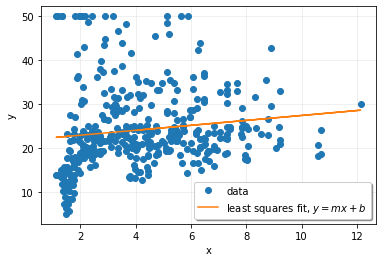

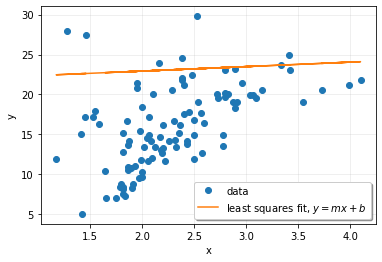

In [116]:
plotxyyhat(train[:, 7], train[:, 12], c[1], c[0])
plotxyyhat(test[:, 7], test[:, 12], c[1], c[0])

## 2. Use polynomial regression to better fit the nonlinear data relationship

### Try Quadratic polynomial model:

$$y = c_0 + c_1x_1 + c_2x_1^2$$

where $x_1$ is what?

In [117]:
def makePoly(x, poly):
    A = np.zeros([x.shape[0], poly+1])
    for i in range(0, poly+1):
        print(i)
        A[:, i] = np.squeeze(x**i)
    print(getSummaryStatistics(A))
    print(getShapeType(A))
    return A
    
def fit(data, independent, dependent, poly):
    # This is our independent variable, just one for now
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = makePoly(x, poly)
    # This is the dependent variable 
    y = data[:, dependent]
    print(getSummaryStatistics(y))
    print(getShapeType(y))

    # This is the regression coefficients that were fit, plus some other results
    # c, res, _, _ = sp.linalg.lstsq(A, y)
    c, res, _, _ = sp.linalg.lstsq(A, y)
    return c

def predict(data, independent, poly, c):
    # These are our independent variable(s)
    x = data[np.ix_(np.arange(data.shape[0]), independent)]
    print(getSummaryStatistics(x))
    print(getShapeType(x))

    # We add a column of 1s for the intercept
    A = makePoly(x, poly)

    return np.dot(A, c)


In [120]:
c = fit(train, [7], 12, 2)
yhat = predict(test, [7], 2, c)
rsquared(test[:, 12], yhat)

[[12.1265]
 [ 1.1296]
 [ 3.    ]]
((405, 1), dtype('float64'))
0
1
2
[[  1.          12.1265     147.05200225]
 [  1.           1.1296       1.27599616]
 [  1.           3.          21.        ]]
((405, 3), dtype('float64'))
[50.  5. 23.]
((405,), dtype('float64'))
[[4.0983]
 [1.1781]
 [1.    ]]
((101, 1), dtype('float64'))
0
1
2
[[ 1.          4.0983     16.79606289]
 [ 1.          1.1781      1.38791961]
 [ 1.          1.          5.        ]]
((101, 3), dtype('float64'))


1.64020794320594

In [121]:
def plotxyyhat(x, y, c):
    plt.clf()
    plt.plot(x, y, 'o', label='data')
    xCurve = np.linspace(np.min(x), np.max(x))
    yCurve = c[0]
    for i in range(1, len(c)):
        yCurve += c[i]*(xCurve**i)
    plt.plot(xCurve, yCurve, label='least squares fit, y polynomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(framealpha=1, shadow=True)
    plt.grid(alpha=0.25)
    plt.show()

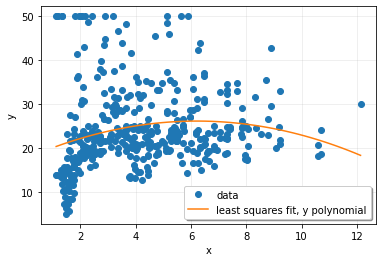

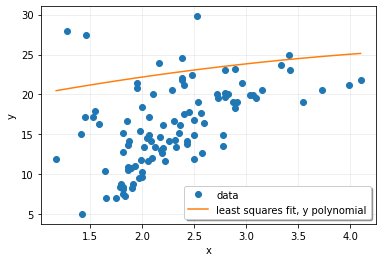

In [122]:
plotxyyhat(train[:, 7], train[:, 12], c)
plotxyyhat(test[:, 7], test[:, 12], c)

### Now let's try a cubic model

$$y = c_0 + c_1x_1 + c_2x_1^2 + c_3x_1^3$$

In [123]:
c = fit(train, [7], 12, 3)
yhat = predict(test, [7], 3, c)
rsquared(test[:, 12], yhat)

[[12.1265]
 [ 1.1296]
 [ 3.    ]]
((405, 1), dtype('float64'))
0
1
2
3
[[1.00000000e+00 1.21265000e+01 1.47052002e+02 1.78322611e+03]
 [1.00000000e+00 1.12960000e+00 1.27599616e+00 1.44136526e+00]
 [1.00000000e+00 3.00000000e+00 2.10000000e+01 1.38000000e+02]]
((405, 4), dtype('float64'))
[50.  5. 23.]
((405,), dtype('float64'))
[[4.0983]
 [1.1781]
 [1.    ]]
((101, 1), dtype('float64'))
0
1
2
3
[[ 1.          4.0983     16.79606289 68.83530454]
 [ 1.          1.1781      1.38791961  1.63510809]
 [ 1.          1.          5.         14.        ]]
((101, 4), dtype('float64'))


1.7565098093734828

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (50,)

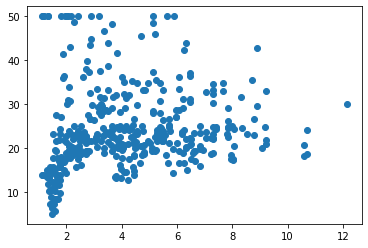

In [127]:
plotxyyhat(train[:, 7], train[:, 12], c)
plotxyyhat(test[:, 7], test[:, 12], c)